In [1]:
import numpy as np
import pandas as pd

In [2]:
courses = pd.read_csv('courses.csv')
nov = pd.read_csv('reg-month1.csv')
dec = pd.read_csv('reg-month2.csv')
students = pd.read_csv('students.csv')
delivery = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches - matches.csv')

### concat :

In [3]:
# we can vertically stack two dataframes using pd.concat()

In [4]:
pd.concat([nov,dec])

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [5]:
# if two dataframes concat they will show there diff index. In this case, use a parameter ignore_index=True

In [6]:
regs = pd.concat([nov,dec],ignore_index=True) # now no index is repeating.

In [7]:
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


#### df.append( )

In [8]:
# the alternative of concat is append.

In [9]:
nov.append(dec,ignore_index=True)

/tmp/ipykernel_11055/3584171061.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nov.append(dec,ignore_index=True)


,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [10]:
# both are same but use concat because append() will deprecate soon it will not be available in future versions.

In [11]:
# Multiindex dataframe:
multi = pd.concat([nov,dec],keys=['nov','dec'])
multi

student_id  course_id
nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

In [12]:
# two indexes has been created.

In [13]:
multi.loc['dec']

,student_id,course_id
0,3,5
1,16,7
2,12,10
3,12,1
4,14,9
5,7,7
6,7,2
7,16,3
8,17,10
9,11,8


In [14]:
# loc -> lable based indexing
# iloc -> int position based indexing.

In [15]:
# concat dataframes horizontally:
pd.concat([nov,dec],axis=1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


### Merge:

In [16]:
# inner join
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [17]:
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [18]:
students.merge(regs,how='inner',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


In [19]:
# left join
courses.merge(regs,how='left',on='course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


In [20]:
# right join
students.merge(regs,how='right',on='student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


In [21]:
# outer join
students.merge(regs,how='outer',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23.0,1.0
1,1,Kailash Harjo,23.0,6.0
2,1,Kailash Harjo,23.0,10.0
3,1,Kailash Harjo,23.0,9.0
4,2,Esha Butala,1.0,5.0
5,3,Parveen Bhalla,3.0,3.0
6,3,Parveen Bhalla,3.0,5.0
7,4,Marlo Dugal,14.0,NaN
8,5,Kusum Bahri,6.0,NaN
9,6,Lakshmi Contractor,10.0,NaN


In [22]:
# find total revenue generated 

In [23]:
regs.merge(courses,how='inner',on='course_id')['price'].sum()

154247

In [24]:
# find month by month revenue.

In [25]:
temp_df = pd.concat([nov,dec],keys=['nov','dec']).reset_index()

In [26]:
temp_df

,level_0,level_1,student_id,course_id
0,nov,0,23,1
1,nov,1,15,5
2,nov,2,18,6
3,nov,3,23,4
4,nov,4,16,9
5,nov,5,18,1
6,nov,6,1,1
7,nov,7,7,8
8,nov,8,22,3
9,nov,9,15,1


In [27]:
temp_df.merge(courses,on='course_id').groupby('level_0')['price'].sum()

level_0
dec    65072
nov    89175
Name: price, dtype: int64

In [28]:
# print the registration table
# cols -> name -> course -> price

In [29]:
regs.merge(students,on='student_id').merge(courses,on='course_id')[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,python,2499
2,Fardeen Mahabir,python,2499
3,Kailash Harjo,python,2499
4,Seema Kota,python,2499
5,Shashank D’Alia,python,2499
6,Radha Dutt,python,2499
7,Pranab Natarajan,python,2499
8,Chhavi Lachman,machine learning,9999
9,Qabeel Raman,machine learning,9999


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [31]:
# plot bar chart for revenue/course

<AxesSubplot:xlabel='course_name'>

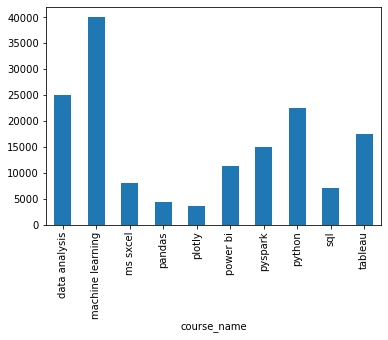

In [32]:
regs.merge(courses,on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

In [33]:
# find students who enrolled in both the months

In [34]:
comn_std_id = np.intersect1d(nov['student_id'],dec['student_id'])
comn_std_id

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23])

In [35]:
students[students['student_id'].isin(comn_std_id)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


In [36]:
# find course that get no enrollment

In [37]:
course_id_list = np.setdiff1d(courses['course_id'],regs['course_id'])

In [38]:
course_id_list

array([11, 12])

In [39]:
courses[courses['course_id'].isin(course_id_list)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [40]:
# find students who did not enroll into any courses

In [41]:
stud_list = np.setdiff1d(students['student_id'],regs['student_id'])

In [42]:
stud_list

array([ 4,  5,  6,  8,  9, 10, 20])

In [43]:
students[students['student_id'].isin(stud_list)]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11


In [44]:
# self join
students.merge(students,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


In [45]:
# find top 3 students who did most number enrollments

In [46]:
regs.merge(students,how = 'inner',on='student_id').groupby(['student_id','name'])['name'].count().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      6
7           Tarun Thaker        5
14          Pranab Natarajan    4
Name: name, dtype: int64

In [47]:
regs.merge(students,how = 'inner',on='student_id')[['student_id','name']].value_counts().head(3)

student_id  name            
23          Chhavi Lachman      6
7           Tarun Thaker        5
14          Pranab Natarajan    4
dtype: int64

In [48]:
# find top 3 students who spent most amount of money on courses.

In [49]:
# regs
students.merge(regs,on='student_id').merge(courses,on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

In [50]:
# IPL Problems

# find top 3 stadiums with highest (sixes/match) ratio
# find orange cap holder of all the seasons

In [51]:
temp_df = matches.merge(delivery,left_on='id',right_on='match_id')

In [52]:
dump = temp_df[temp_df['batsman_runs']==6]

In [53]:
dump.groupby('venue')['venue'].count().sort_values(ascending=False).head(3)

venue
M Chinnaswamy Stadium    873
Wankhede Stadium         657
Feroz Shah Kotla         636
Name: venue, dtype: int64

In [54]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
